# Data distribution for Shasta Reservoir
In this notebook, we compare the distributions (CDF) for the input hydrology and the output releases for the train (60%), validation (20%), and test (20%) datsets. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import mannwhitneyu

In [2]:
from src.data.data_processing import *
from src.data.data_fetching import *

In [3]:
print(f'Old working directory: {os.getcwd()}')
# change directory out of subdirectory 'experiments'
os.chdir('..')
print(f'Current working directory: {os.getcwd()}')

Old working directory: c:\Users\mattc\Documents\DL-reservoir-modeling\experiments
Current working directory: c:\Users\mattc\Documents\DL-reservoir-modeling


In [4]:
# Read in data, columns are [inflow, outflow, storage]
df = usbr_fetch_data(name='Shasta', vars=['inflow', 'outflow', 'storage'])
# Select data window (beginning of 1944 to end of 2022)
df = df['1944-01-01':'2022-12-31'].copy()
# Remove na
df = df.dropna(how='any')
data = df.values

In [5]:
# Split the data into train/validation/test sets
data_train, data_val, data_test = train_val_test(data=data, train_frac=0.6, val_frac=0.2, test_frac=0.2)

### Compare hydrology (inflow) CDF's

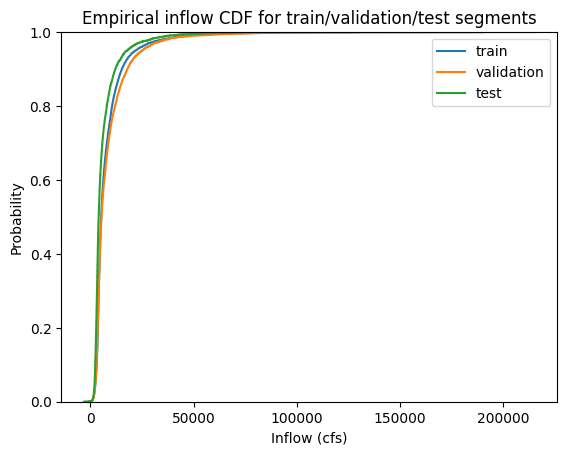

In [7]:
fig, ax = plt.subplots()
ax.ecdf(data_train[:, 0], label='train')
ax.ecdf(data_val[:, 0], label='validation')
ax.ecdf(data_test[:, 0], label='test')
ax.legend()
ax.set_title('Empirical inflow CDF for train/validation/test segments')
ax.set_ylabel('Probability')
ax.set_xlabel('Inflow (cfs)')
plt.show()

### Compare outflow CDF's

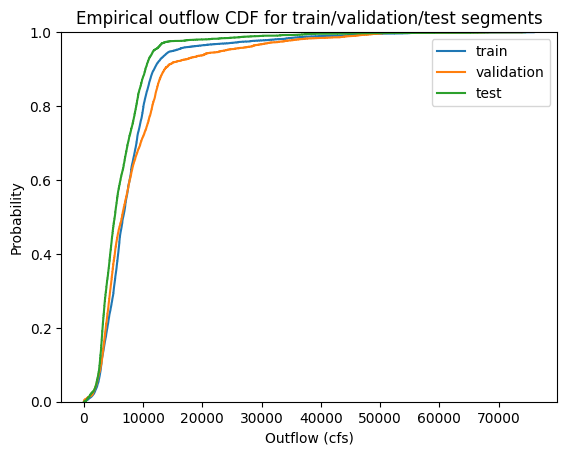

In [9]:
fig, ax = plt.subplots()
ax.ecdf(data_train[:, 1], label='train')
ax.ecdf(data_val[:, 1], label='validation')
ax.ecdf(data_test[:, 1], label='test')
ax.legend()
ax.set_title('Empirical outflow CDF for train/validation/test segments')
ax.set_ylabel('Probability')
ax.set_xlabel('Outflow (cfs)')
plt.show()

### Is the hydrology for the test set significantly drier than the training set?
Test the difference in distribution using a one sided Mann-Whiteney U-test

In [13]:
mannwhitneyu(x=data_train[:, 0], y=data_test[:, 0], alternative='greater').pvalue

6.196803448023914e-183

How about comparing the validation and train set?

In [14]:
mannwhitneyu(x=data_train[:, 0], y=data_val[:, 0], alternative='greater').pvalue

0.9978372613828599

The test set appears to be significantly drier than the trianing set, while the same is not true for the validation set.